In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import time
from sklearn.model_selection import train_test_split
from scipy.stats import linregress

In [3]:
# Loading the generated CSV file
df = pd.read_csv("sensorinfo.csv")
df.head().style.set_caption('CSV made from querying the database')

,Unnamed: 0,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,Motor Current Phase C,Motor Input Power,Motor Power Factor,Motor Voltage,Pump Discharge Pressure,Pump Discharge Volumetric Flow,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2_x,Pump Thrust Bearing Temperature 2_y
0,0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.656300,304479.062500,1779.438599,1782.647461,71.223015,76.965309,145.308487,145.308487,144.000000,nan,nan,4234.068848,1792.041260,857.314758,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556,86.571556
1,1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.750000,303782.281300,1779.364014,1782.624756,71.215706,76.948776,145.000000,146.000000,144.000000,nan,nan,4235.000000,1791.922119,860.612488,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018,86.565018
2,2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.968800,303518.437500,1779.289551,1782.602173,71.208389,76.932243,146.306839,146.613678,144.613678,nan,nan,4236.454590,1791.802856,858.203491,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487,86.558487
3,3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.062500,303576.375000,1779.214966,1782.579468,71.201080,76.912827,146.000000,146.301178,145.000000,nan,nan,4232.772461,1791.683716,859.122131,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956,86.551956
4,4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.062500,303999.531300,1779.140381,1782.556885,71.193764,76.892960,146.305389,147.000000,145.000000,nan,nan,4240.088379,1791.564575,858.152527,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425,86.545425


In [4]:
df.drop('Unnamed: 0', axis=1,inplace=True)
df.drop('Pump Thrust Bearing Temperature 2_y', axis=1,inplace=True)
df=df.rename(columns ={"Pump Thrust Bearing Temperature 2_x":"Pump Thrust Bearing Temperature 2"})
df.head()

,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,145.308487,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,145.000000,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,146.306839,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,146.000000,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,146.305389,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


In [5]:
df.columns

Index(['timestamp', 'Auxiliary Boilers A/B Feed Water Header Pressure 2',
       'Auxiliary Boilers Feed Water Header Pressure',
       'Heat Recovery System Header Mass Flow',
       'Heat Recovery System Header Mass Flow.1',
       'Heat Recovery System Header Pressure',
       'Heat Recovery System Header Pressure.1',
       'Lube Oil Cooler Outlet Temperature', 'Lube Oil Tank Temperature',
       'Motor Current Phase A', 'Motor Current Phase B',
       'Motor Current Phase C', 'Motor Input Power', 'Motor Power Factor',
       'Motor Voltage', 'Pump Discharge Pressure',
       'Pump Discharge Volumetric Flow', 'Pump Journal 1 Bearing Temperature',
       'Pump Journal 2 Bearing Temperature', 'Pump Radial Bearing Vibration',
       'Pump Shaft Speed', 'Pump Suction Pressure 1',
       'Pump Suction Pressure 2',
       'Pump Suction Strainer Differential Pressure',
       'Pump Suction Temperature', 'Pump Thrust Bearing Temperature 1',
       'Pump Thrust Bearing Temperature 2'],
    

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204799 entries, 0 to 4204798
Data columns (total 27 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   timestamp                                           object 
 1   Auxiliary Boilers A/B Feed Water Header Pressure 2  float64
 2   Auxiliary Boilers Feed Water Header Pressure        float64
 3   Heat Recovery System Header Mass Flow               float64
 4   Heat Recovery System Header Mass Flow.1             float64
 5   Heat Recovery System Header Pressure                float64
 6   Heat Recovery System Header Pressure.1              float64
 7   Lube Oil Cooler Outlet Temperature                  float64
 8   Lube Oil Tank Temperature                           float64
 9   Motor Current Phase A                               float64
 10  Motor Current Phase B                               float64
 11  Motor Current Phase C                

In [7]:
#converting timestamp coloumn to pandas datatime for visualization
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:
df

,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,145.308487,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,145.000000,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,146.306839,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,146.000000,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,146.305389,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204794,2019-12-31 23:58:45,1305.224976,1305.452515,325015.4688,330229.3438,1702.869385,1706.575195,62.233841,61.810455,158.000000,...,132.747528,139.821579,8.379042,3590.083252,25.555643,17.410847,0.404363,227.793106,90.913559,79.749840
4204795,2019-12-31 23:59:00,1304.164673,1303.207764,324984.6250,329936.0625,1703.680542,1707.391357,62.240265,61.803555,157.493698,...,132.746460,139.821533,8.331427,3590.082275,25.587416,17.416965,0.396943,227.794098,90.914070,79.748138
4204796,2019-12-31 23:59:15,1308.058838,1306.166016,324521.2500,329425.6875,1704.491699,1708.207642,62.246689,61.796654,157.018768,...,132.745392,139.821487,8.089752,3590.081055,25.644440,17.423084,0.396188,227.795090,90.914574,79.746437
4204797,2019-12-31 23:59:30,1315.320679,1312.660889,324716.9688,330124.7500,1705.302856,1709.023926,62.253113,61.789753,157.975784,...,132.744324,139.821457,7.992675,3590.080078,25.580099,17.429203,0.395433,227.796082,90.915085,79.744728


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204799 entries, 0 to 4204798
Data columns (total 27 columns):
 #   Column                                              Dtype         
---  ------                                              -----         
 0   timestamp                                           datetime64[ns]
 1   Auxiliary Boilers A/B Feed Water Header Pressure 2  float64       
 2   Auxiliary Boilers Feed Water Header Pressure        float64       
 3   Heat Recovery System Header Mass Flow               float64       
 4   Heat Recovery System Header Mass Flow.1             float64       
 5   Heat Recovery System Header Pressure                float64       
 6   Heat Recovery System Header Pressure.1              float64       
 7   Lube Oil Cooler Outlet Temperature                  float64       
 8   Lube Oil Tank Temperature                           float64       
 9   Motor Current Phase A                               float64       
 10  Motor Current Phas

/var/folders/89/krsw3v1d59x2vrmqhb4x8qx80000gn/T/ipykernel_3806/487705185.py:24: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/sagnikhalder/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


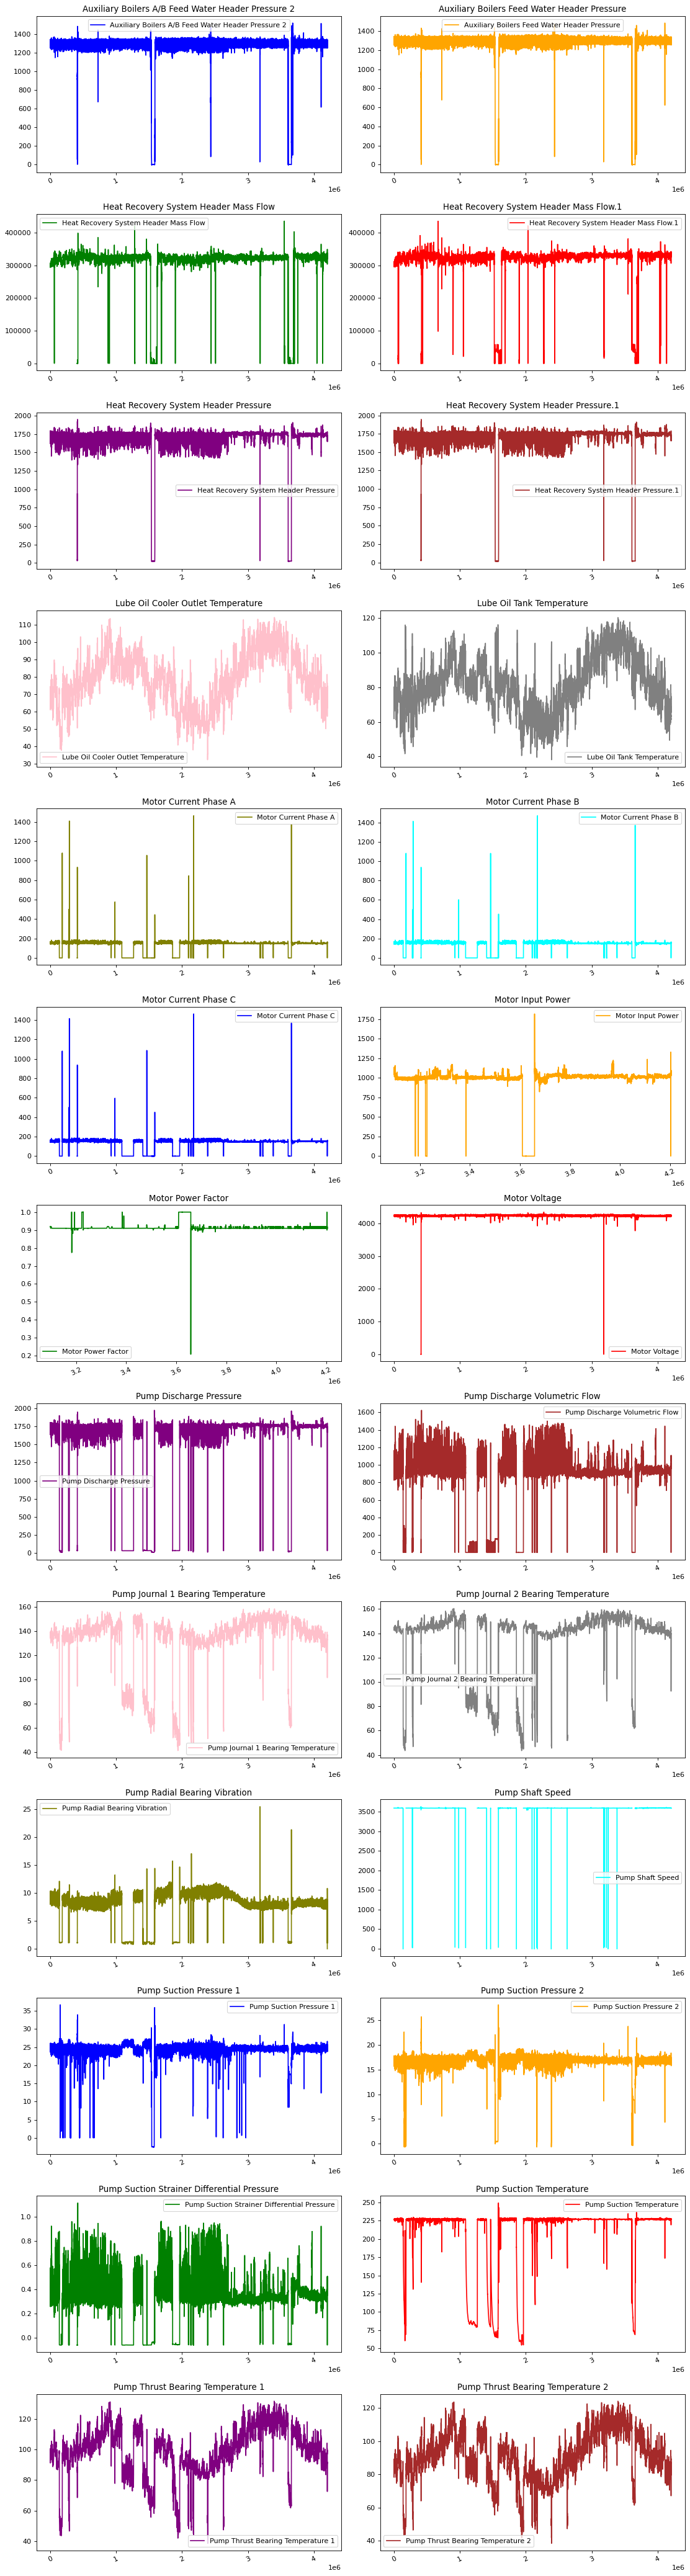

In [10]:
#The index could have been set to datetime but that makes the performance of this huge dataset for visualisation very slow
#Hence it will be avoided until unless deemed very necessary, visualization however wont be affected as the datetime coloumns are already sorted
color_list = ["blue",    "orange",    "green",    "red",    "purple",    "brown",    "pink",    "gray",    "olive",    "cyan",]


def Visualize(data):
    features= list(data.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(df)

### What can be inferred from the above is that the in case of some of the features, the value is dropping down to zero value
### This either means that the value is either not present there or the machine was turned off hence the sensor reported a 0 value

In [11]:
#Checking for null values
df.isnull().sum()/len(df)*100

timestamp                                              0.000000
Auxiliary Boilers A/B Feed Water Header Pressure 2     0.004209
Auxiliary Boilers Feed Water Header Pressure           0.004376
Heat Recovery System Header Mass Flow                  0.004471
Heat Recovery System Header Mass Flow.1                0.003948
Heat Recovery System Header Pressure                   0.006017
Heat Recovery System Header Pressure.1                 0.006017
Lube Oil Cooler Outlet Temperature                     0.016410
Lube Oil Tank Temperature                              0.006231
Motor Current Phase A                                  0.035911
Motor Current Phase B                                  0.034936
Motor Current Phase C                                  0.034223
Motor Input Power                                     73.629346
Motor Power Factor                                    73.629489
Motor Voltage                                          0.031916
Pump Discharge Pressure                 

### The above shows that two of the coloumns are almost null and can be dropped, the coloumn with around 14% null values, it can be used to slice the dataset instead of dropping

In [12]:
df.drop(['Motor Input Power','Motor Power Factor'], axis=1, inplace=True)
df.head()

,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,145.308487,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,145.000000,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,146.306839,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,146.000000,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,146.305389,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


In [13]:
#Using value of pump shaft speed to slice the dataset, this will ensure that almost all the sensors were in operational condition at the time
df = df[df['Pump Shaft Speed']>3000].reset_index(drop=True)
df.head()

,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,145.308487,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,145.000000,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,146.306839,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,146.000000,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,146.305389,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425


### Using forward fill to impute the remaining null values because this is a continous series of data

In [14]:
# dealing with the nulls by ffill
df = df.fillna(method='ffill')
df.isnull().sum()

timestamp                                             0
Auxiliary Boilers A/B Feed Water Header Pressure 2    0
Auxiliary Boilers Feed Water Header Pressure          0
Heat Recovery System Header Mass Flow                 0
Heat Recovery System Header Mass Flow.1               0
Heat Recovery System Header Pressure                  0
Heat Recovery System Header Pressure.1                0
Lube Oil Cooler Outlet Temperature                    0
Lube Oil Tank Temperature                             0
Motor Current Phase A                                 0
Motor Current Phase B                                 0
Motor Current Phase C                                 0
Motor Voltage                                         0
Pump Discharge Pressure                               0
Pump Discharge Volumetric Flow                        0
Pump Journal 1 Bearing Temperature                    0
Pump Journal 2 Bearing Temperature                    0
Pump Radial Bearing Vibration                   

In [15]:
df

,timestamp,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2
0,2018-01-01 00:00:15,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,145.308487,...,137.135651,144.300110,9.661202,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556
1,2018-01-01 00:00:30,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,145.000000,...,137.133484,144.299057,9.655985,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018
2,2018-01-01 00:00:45,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,146.306839,...,137.131317,144.298004,9.650768,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487
3,2018-01-01 00:01:00,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,146.000000,...,137.129150,144.296936,9.645551,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956
4,2018-01-01 00:01:15,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,146.305389,...,137.126968,144.295883,9.642216,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588277,2019-12-31 23:58:45,1305.224976,1305.452515,325015.4688,330229.3438,1702.869385,1706.575195,62.233841,61.810455,158.000000,...,132.747528,139.821579,8.379042,3590.083252,25.555643,17.410847,0.404363,227.793106,90.913559,79.749840
3588278,2019-12-31 23:59:00,1304.164673,1303.207764,324984.6250,329936.0625,1703.680542,1707.391357,62.240265,61.803555,157.493698,...,132.746460,139.821533,8.331427,3590.082275,25.587416,17.416965,0.396943,227.794098,90.914070,79.748138
3588279,2019-12-31 23:59:15,1308.058838,1306.166016,324521.2500,329425.6875,1704.491699,1708.207642,62.246689,61.796654,157.018768,...,132.745392,139.821487,8.089752,3590.081055,25.644440,17.423084,0.396188,227.795090,90.914574,79.746437
3588280,2019-12-31 23:59:30,1315.320679,1312.660889,324716.9688,330124.7500,1705.302856,1709.023926,62.253113,61.789753,157.975784,...,132.744324,139.821457,7.992675,3590.080078,25.580099,17.429203,0.395433,227.796082,90.915085,79.744728


## Getting rid of outliers using IQR

### Lets first see how much outliers exist in case of each feature using a box plot

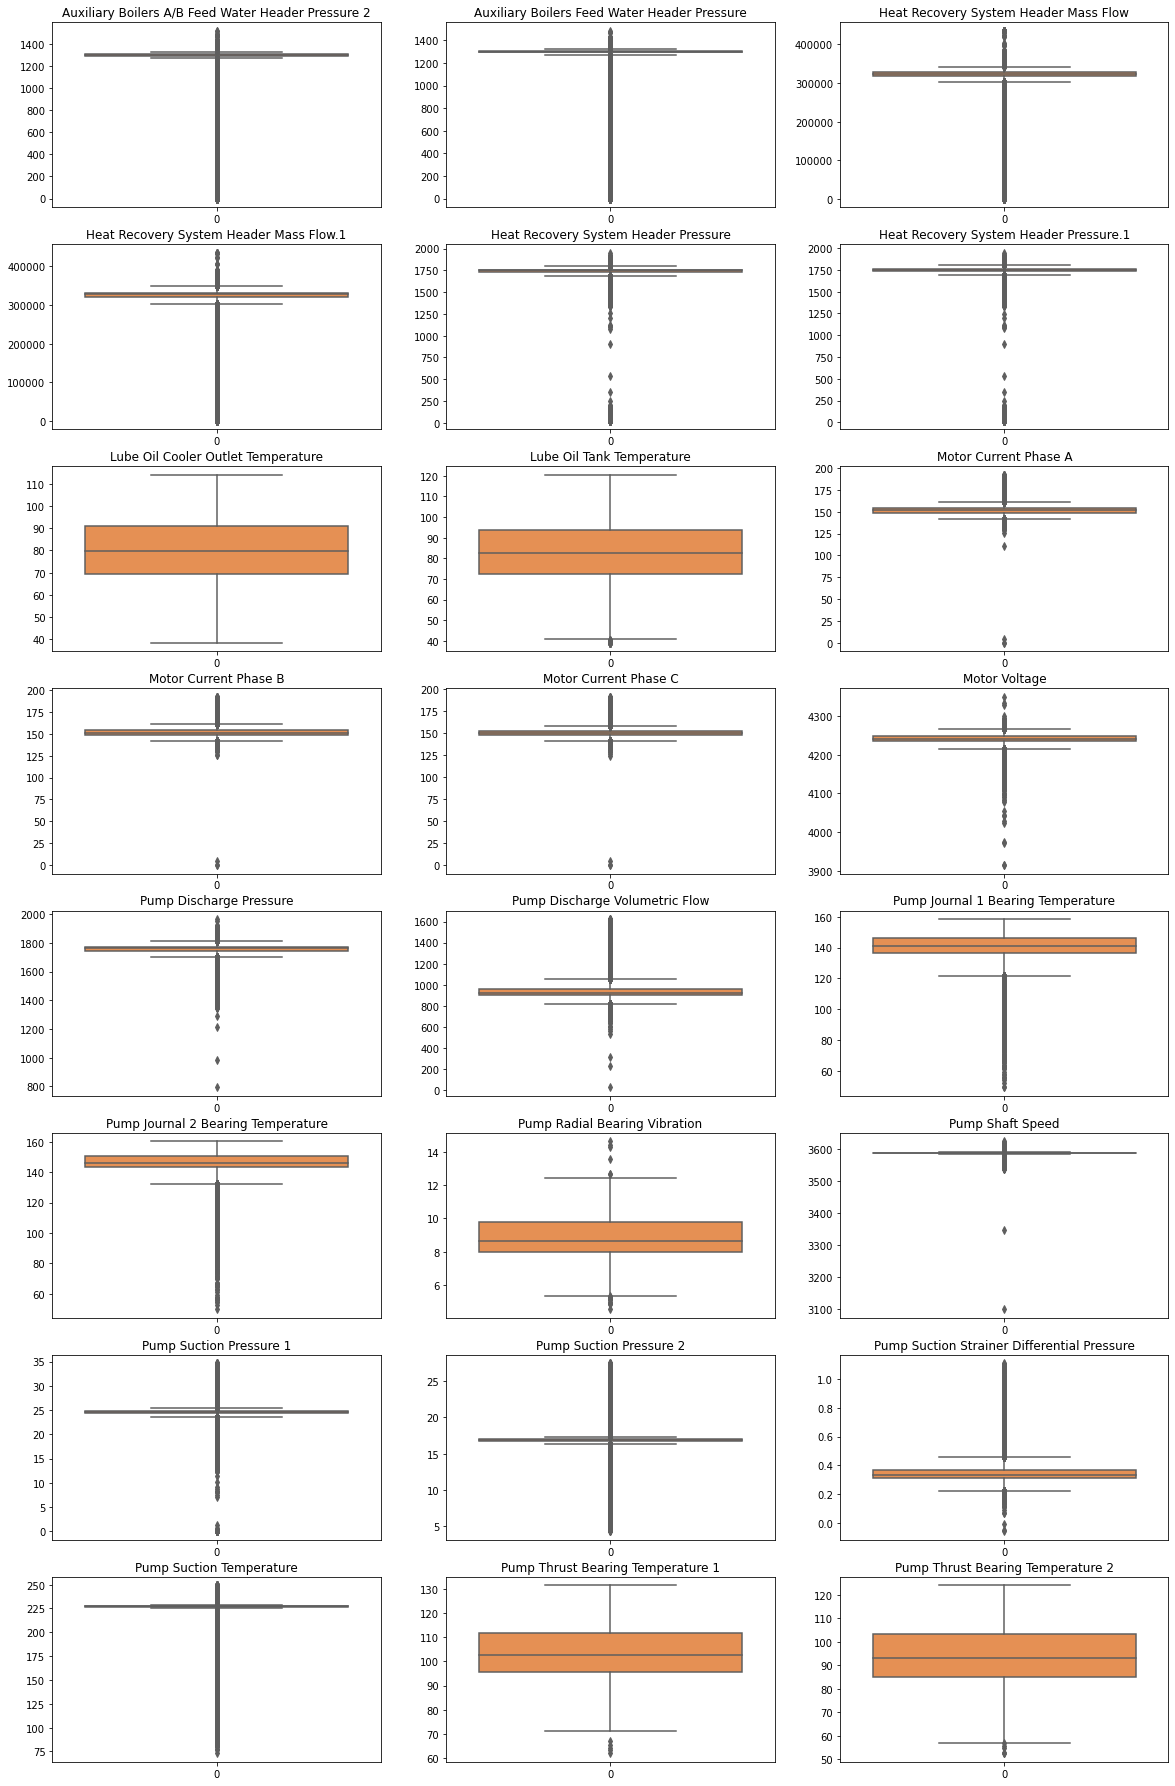

In [16]:
# setup plot
plot_cols = 3 # no of columns / change to preference
list_feats = [a for a in df.columns if 'timestamp' not in a] # all features -timestamp

total_rows = int(np.ceil(len(list_feats) / plot_cols))
fig, ax = plt.subplots(nrows=total_rows, ncols=plot_cols, figsize=(20, 4 * total_rows)) # setup subplots

# loop each feature / plot
j = 0 # keeps track of rows
for i in range(0, len(list_feats)): # loop index of each feature
    
    # create plot
    sns.boxplot(data=[df[list_feats[i]]], palette='YlOrRd', ax=ax[j,i % plot_cols])
    ax[j,i % plot_cols].set_title(list_feats[i])
    ax[j,i % plot_cols].set_ylabel('')
    ax[j,i % plot_cols].set_xlabel('')
    
    # increment row
    if i % plot_cols == (plot_cols - 1): j += 1 # basically says at end of each column start a new row

plt.show()

### Good amount of outliers are indeed present in all the coloumns, lets use IQR now and then check again

In [17]:
cols = df.loc[:, df.columns!='timestamp']

Q1 = cols.quantile(0.25)
Q3 = cols.quantile(0.75)
IQR = Q3 - Q1

df = df[~((cols < (Q1 - 1.5 * IQR)) |(cols > (Q3 + 1.5 * IQR))).any(axis=1)]


### lets check for outliers now

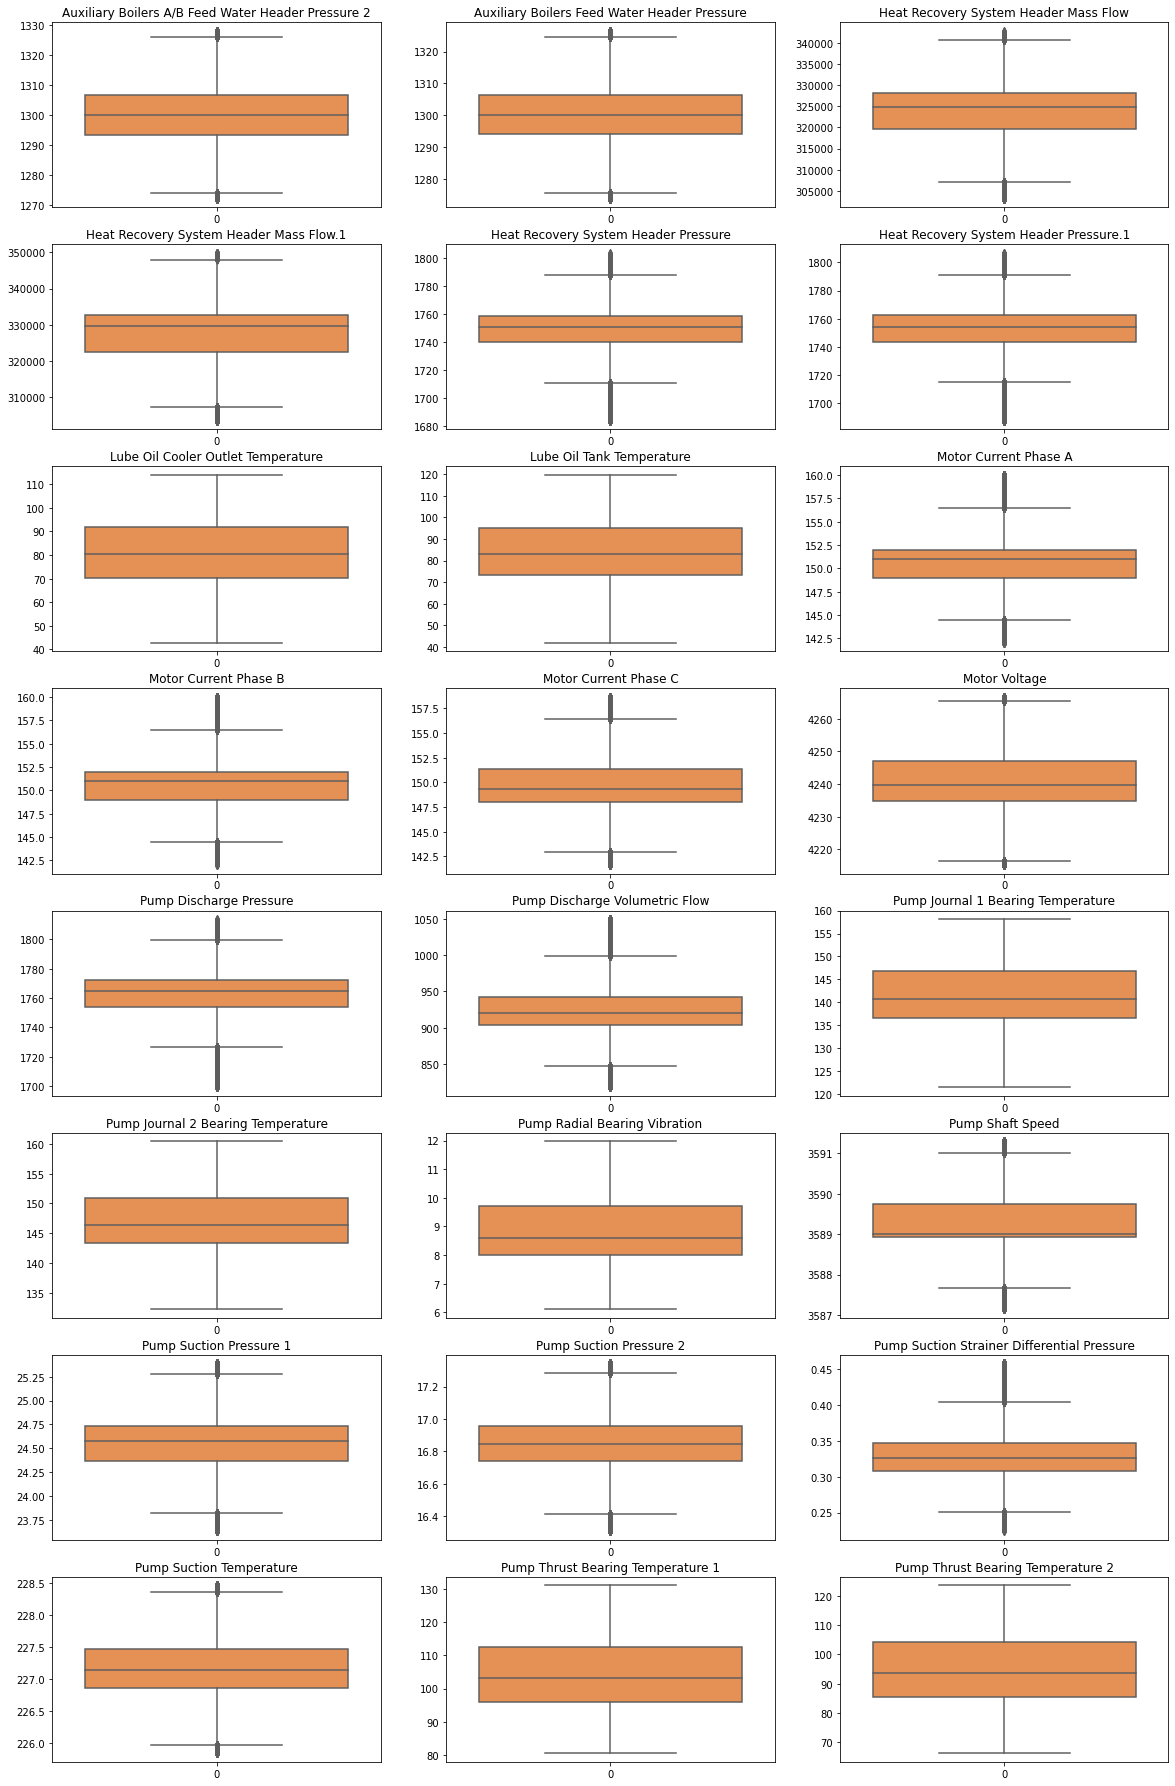

In [18]:
# setup plot
plot_cols = 3 # no of columns / change to preference
list_feats = [a for a in df.columns if 'timestamp' not in a] # all features -timestamp

total_rows = int(np.ceil(len(list_feats) / plot_cols))
fig, ax = plt.subplots(nrows=total_rows, ncols=plot_cols, figsize=(20, 4 * total_rows)) # setup subplots

# loop each feature / plot
j = 0 # keeps track of rows
for i in range(0, len(list_feats)): # loop index of each feature
    
    # create plot
    sns.boxplot(data=[df[list_feats[i]]], palette='YlOrRd', ax=ax[j,i % plot_cols])
    ax[j,i % plot_cols].set_title(list_feats[i])
    ax[j,i % plot_cols].set_ylabel('')
    ax[j,i % plot_cols].set_xlabel('')
    
    # increment row
    if i % plot_cols == (plot_cols - 1): j += 1 # basically says at end of each column start a new row

plt.show()

### Most of the dataset is almost outlier free now

In [19]:
df.shape

(2651166, 25)

## Now Lets do some feature selection now that feature engineering is done

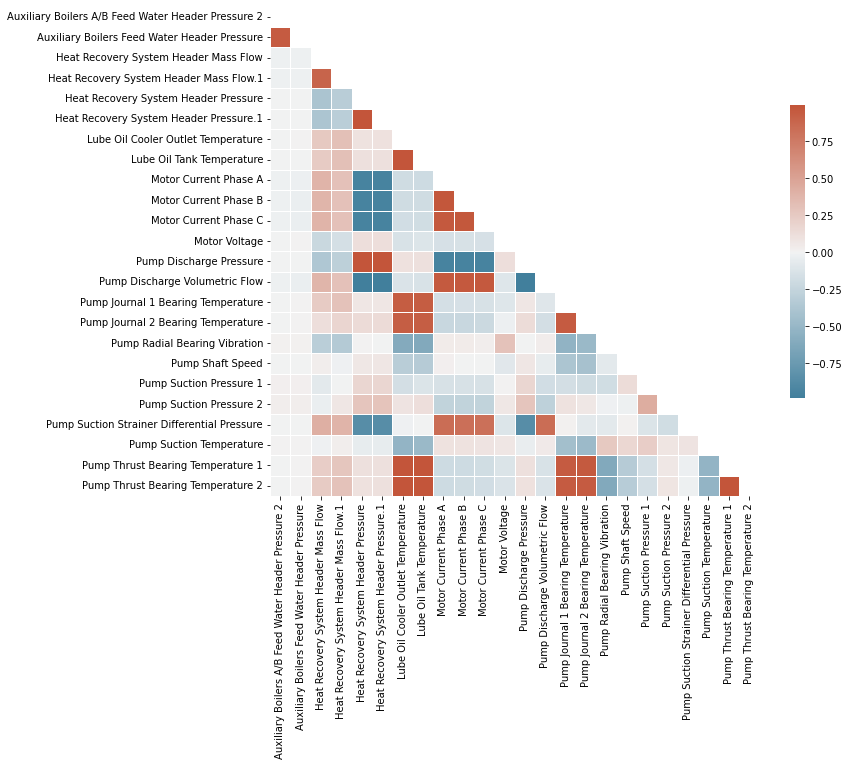

In [21]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# plot
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .6})

plt.show()

### Some highly correlated features do exist, mostly from same type of sensors, these can be dropped

In [22]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(df, 0.95)
len(set(corr_features))

9

In [25]:
corr_features

{'Heat Recovery System Header Pressure.1',
 'Lube Oil Tank Temperature',
 'Motor Current Phase A',
 'Motor Current Phase B',
 'Motor Current Phase C',
 'Pump Discharge Pressure',
 'Pump Discharge Volumetric Flow',
 'Pump Thrust Bearing Temperature 1',
 'Pump Thrust Bearing Temperature 2'}

In [26]:
df1 = df.drop(['Auxiliary Boilers A/B Feed Water Header Pressure 2', 'Heat Recovery System Header Pressure.1','Lube Oil Cooler Outlet Temperature',
                'Motor Current Phase C', 'Motor Current Phase B', 'Pump Discharge Pressure','Pump Thrust Bearing Temperature 2', 'Pump Discharge Volumetric Flow',
                'Heat Recovery System Header Pressure'], axis=1)

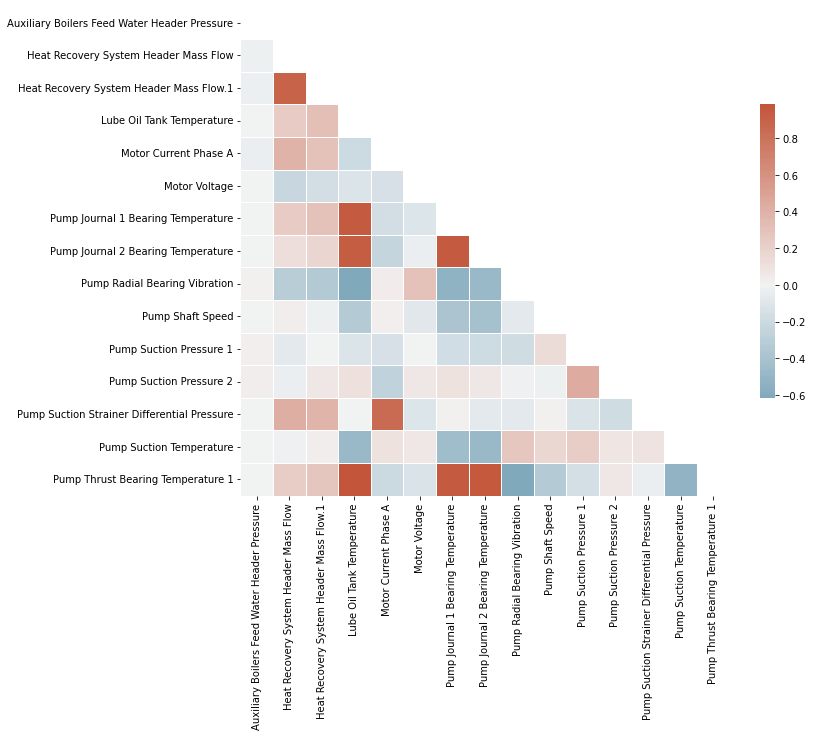

In [28]:
corr = df1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# plot
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .6})

plt.show()

In [30]:
df1.shape

(2651166, 16)

## Basic feature selection has now been done, Lets further explore the data before we begin with modelling in the next stage

### Lets check how are feature and target coloumns are distributed
#### This is a necessary step because not only are we building a regression based model but also we are dealing with sensor data

/Users/sagnikhalder/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sagnikhalder/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sagnikhalder/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

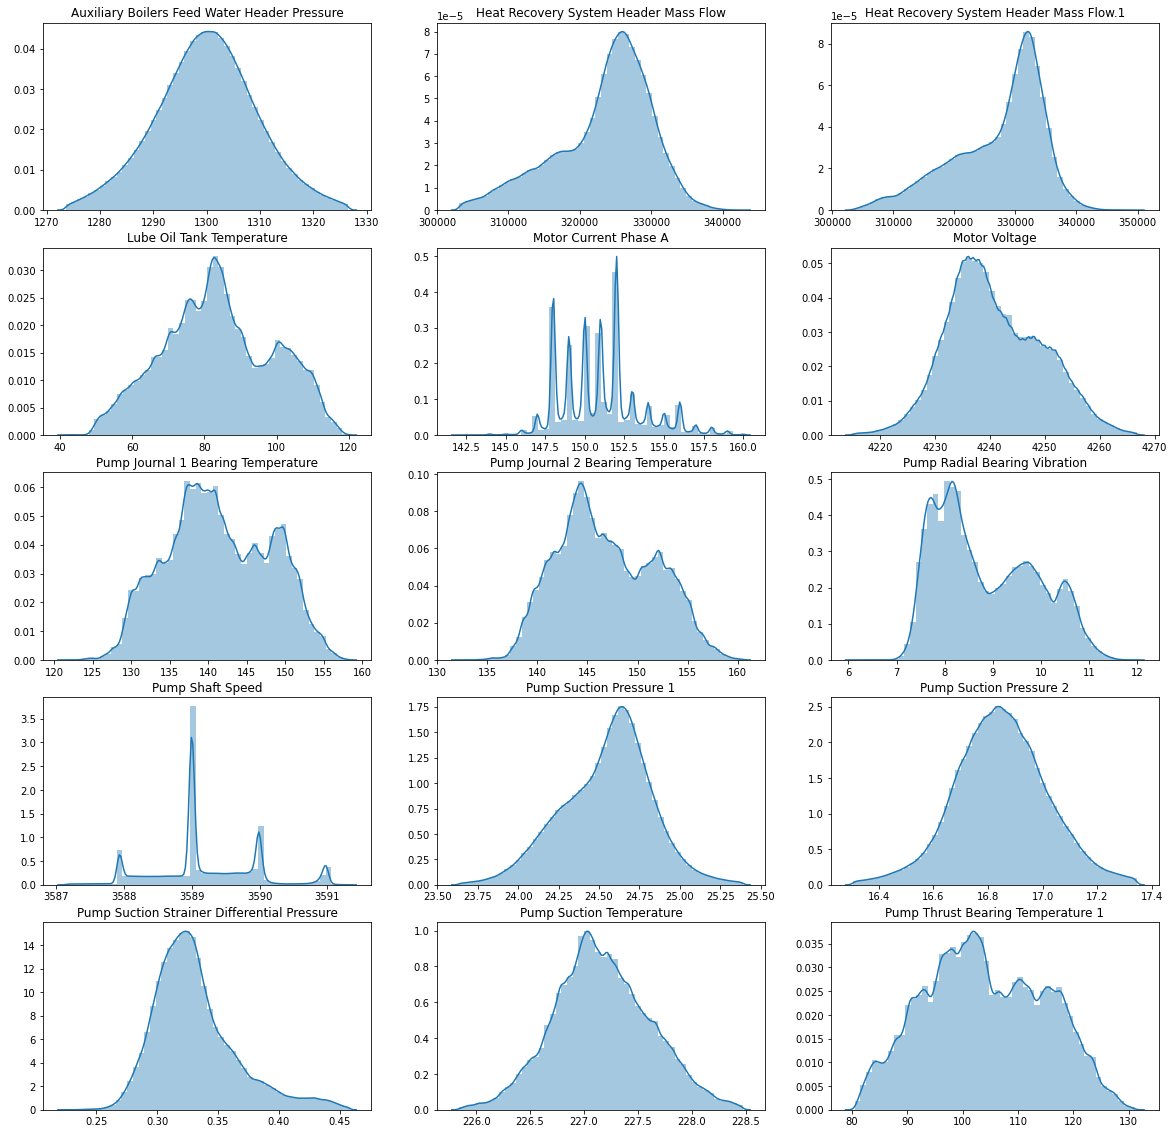

In [35]:
# setup plot
plot_cols = 3 # no of columns / change to preference
list_feats = [a for a in df1.columns if 'timestamp' not in a] # all features
total_rows = int(np.ceil(len(list_feats) / plot_cols))
fig, ax = plt.subplots(nrows=total_rows, ncols=plot_cols, figsize=(20, 4 * total_rows)) # setup subplots

# loop each feature / plot
j = 0 # keeps track of rows
for i in range(0, len(list_feats)): # loop index of each feature
    
    # create plot
    sns.distplot(df1[list_feats[i]], ax=ax[j,i % plot_cols])
    ax[j,i % plot_cols].set_title(list_feats[i])
    ax[j,i % plot_cols].set_ylabel('')
    ax[j,i % plot_cols].set_xlabel('')
    
    # increment row
    if i % plot_cols == (plot_cols - 1): j += 1 # basically says at end of each column start a new row

plt.show()

### The above tells us that dataset features are distributed in various ways, some are normal with skewness, some are multimodal(including our target variable)
#### This might be a challenge for later on which had to be dealt with to remove bottlenecks

## Lets try fitting all the coloumns against the target variable using regressor

### This will give us some insights on which features are more important and which aren't and can form a basis for feature selection when model building comes up

In [37]:
df1.columns

Index(['timestamp', 'Auxiliary Boilers Feed Water Header Pressure',
       'Heat Recovery System Header Mass Flow',
       'Heat Recovery System Header Mass Flow.1', 'Lube Oil Tank Temperature',
       'Motor Current Phase A', 'Motor Voltage',
       'Pump Journal 1 Bearing Temperature',
       'Pump Journal 2 Bearing Temperature', 'Pump Radial Bearing Vibration',
       'Pump Shaft Speed', 'Pump Suction Pressure 1',
       'Pump Suction Pressure 2',
       'Pump Suction Strainer Differential Pressure',
       'Pump Suction Temperature', 'Pump Thrust Bearing Temperature 1'],
      dtype='object')

In [38]:
print(len(df1.columns))

16


In [48]:
#Taking a small sample of the dataframe to decrease plotting time and increase visibility
dfSample = df1.sample(2500)

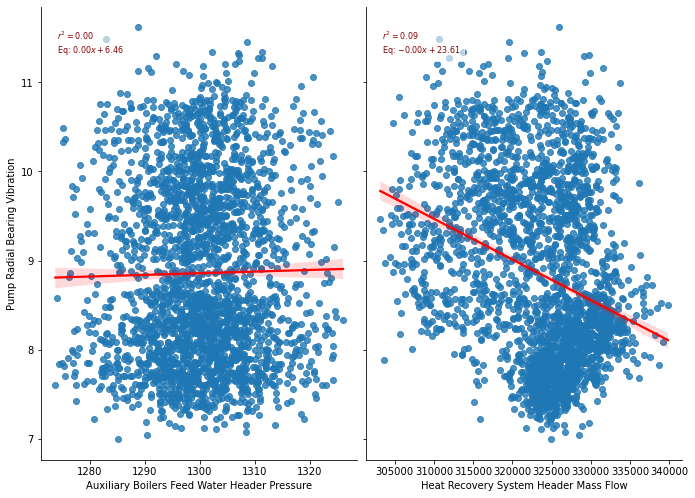

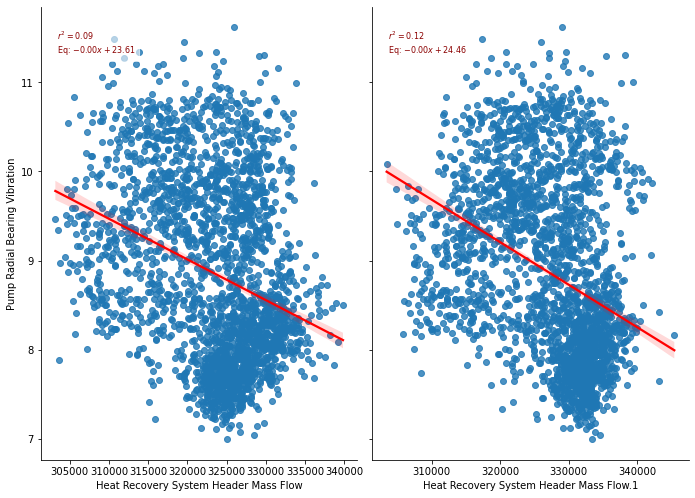

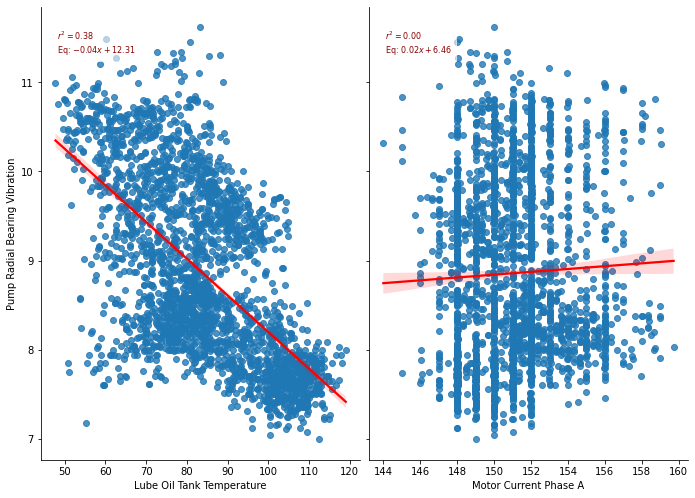

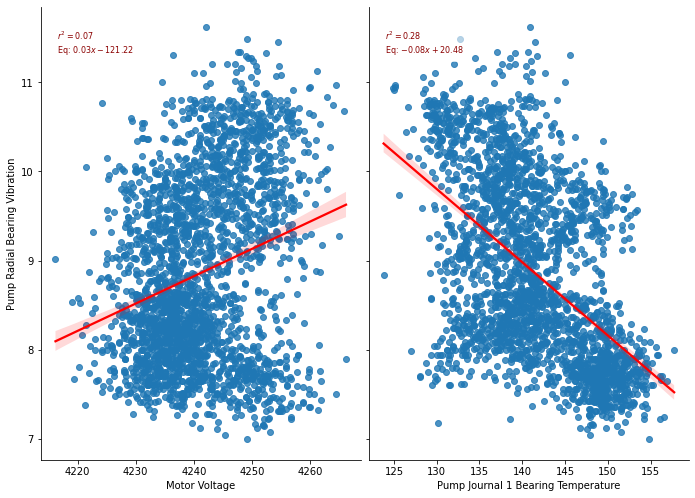

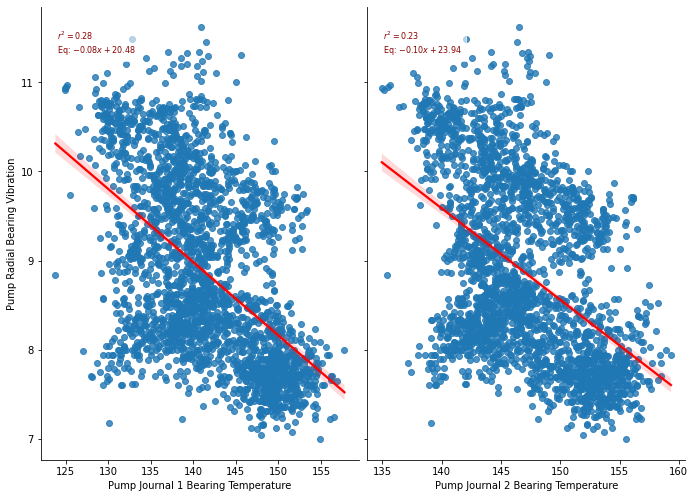

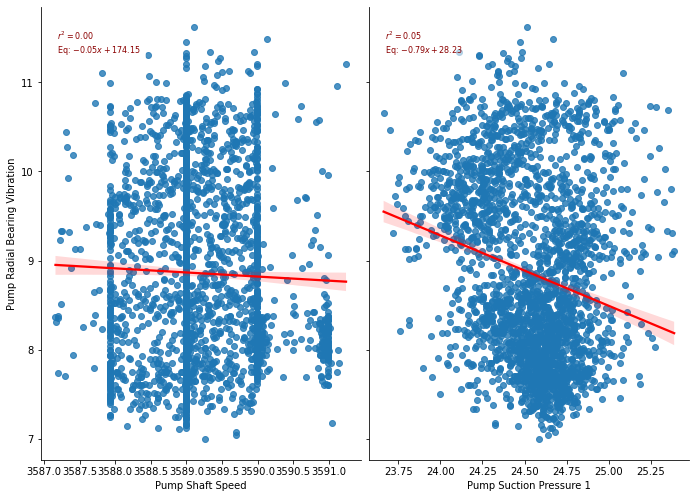

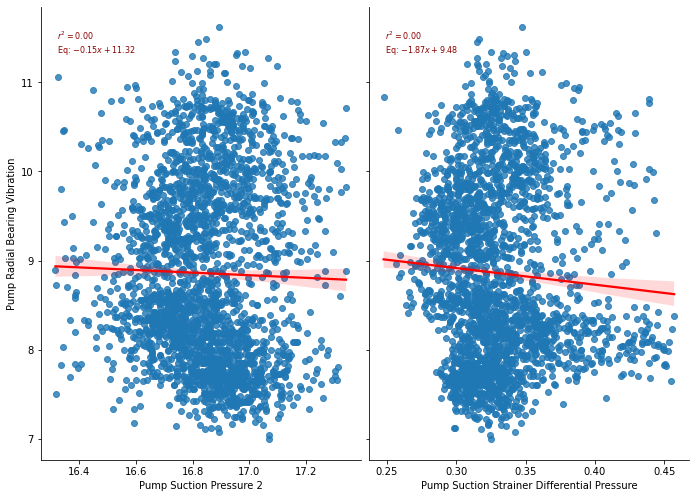

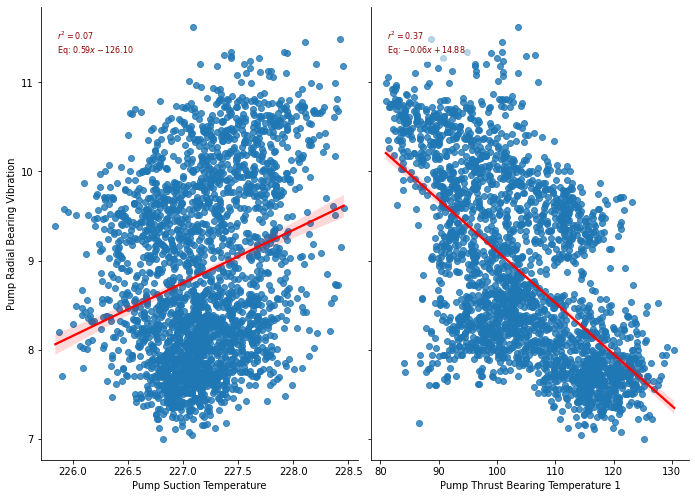

In [56]:
## This is a custom function written to make the pair plotting diplay the r2 and regression equation using annotation on the subplots
def r2(x, y, ax=None, **kws):
    ax = ax or plt.gca()
    slope, intercept, r_value, p_value, std_err = linregress(x=x, y=y)
    ax.annotate(f'$r^2 = {r_value ** 2:.2f}$\nEq: ${slope:.2f}x{intercept:+.2f}$',
                xy=(.05, .95), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')

g = sns.pairplot(dfSample, x_vars=['Auxiliary Boilers Feed Water Header Pressure','Heat Recovery System Header Mass Flow'], y_vars='Pump Radial Bearing Vibration', height=7, aspect = 0.7, kind='reg', plot_kws={'line_kws':{'color':'red'}})
g.map(r2)
b = sns.pairplot(dfSample, x_vars=['Heat Recovery System Header Mass Flow',  'Heat Recovery System Header Mass Flow.1'], y_vars='Pump Radial Bearing Vibration', height=7, aspect = 0.7, kind='reg', plot_kws={'line_kws':{'color':'red'}})
b.map(r2)
e = sns.pairplot(dfSample, x_vars=['Lube Oil Tank Temperature','Motor Current Phase A'], y_vars='Pump Radial Bearing Vibration', height=7, aspect = 0.7, kind='reg', plot_kws={'line_kws':{'color':'red'}})
e.map(r2)
f = sns.pairplot(dfSample, x_vars=['Motor Voltage','Pump Journal 1 Bearing Temperature'], y_vars='Pump Radial Bearing Vibration', height=7, aspect = 0.7, kind='reg', plot_kws={'line_kws':{'color':'red'}})
f.map(r2)
z = sns.pairplot(dfSample, x_vars=['Pump Journal 1 Bearing Temperature','Pump Journal 2 Bearing Temperature'], y_vars='Pump Radial Bearing Vibration', height=7, aspect = 0.7, kind='reg', plot_kws={'line_kws':{'color':'red'}})
z.map(r2)
i = sns.pairplot(dfSample, x_vars=['Pump Shaft Speed', 'Pump Suction Pressure 1'], y_vars='Pump Radial Bearing Vibration', height=7, aspect = 0.7, kind='reg', plot_kws={'line_kws':{'color':'red'}})
i.map(r2)
j = sns.pairplot(dfSample, x_vars=['Pump Suction Pressure 2','Pump Suction Strainer Differential Pressure'], y_vars='Pump Radial Bearing Vibration', height=7, aspect = 0.7, kind='reg', plot_kws={'line_kws':{'color':'red'}})
j.map(r2)
k = sns.pairplot(dfSample, x_vars=['Pump Suction Temperature', 'Pump Thrust Bearing Temperature 1'], y_vars='Pump Radial Bearing Vibration', height=7, aspect = 0.7, kind='reg', plot_kws={'line_kws':{'color':'red'}})
k.map(r2)

plt.show()

### From the above alone we can easily tell that some of the features are indeed related very well with out targer varaible and some aren't

# Now lets save this cleaned csv file after splitting into test and train

In [57]:
# Defining X and y variables
X = df1.drop(['timestamp', 'Pump Radial Bearing Vibration'],axis=1)
y = df1['Pump Radial Bearing Vibration']

In [70]:
X.to_csv('X.csv',index=False)
y.to_csv('y.csv',index=False)